In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## MDCT
$$x_m[n]=x[n+mN],\quad n=0,\dots,2N-1$$
$$\Phi[n,k]=\cos\left(\frac{\pi}{N}\left(n+\frac{1}{2}+\frac{N}{2}\right) \left(k+\frac{1}{2}\right)\right)$$
$$\displaystyle X_m[k]=\sum_{n=0}^{2N-1}\left(w[n]x_m[n]\right)\Phi[n,k],\quad k=0,\dots N-1$$
$$\displaystyle y_m[n]=w[n]\left(\frac{1}{N}\sum_{k=0}^{N-1}X_m[k]\Phi[n,k]\right),\quad n=0,\dots 2N-1$$
$$x[n]=\sum_{m=1}^{\infty}y_m[n-mN]$$

2.48689957516e-14


<Container object of 3 artists>

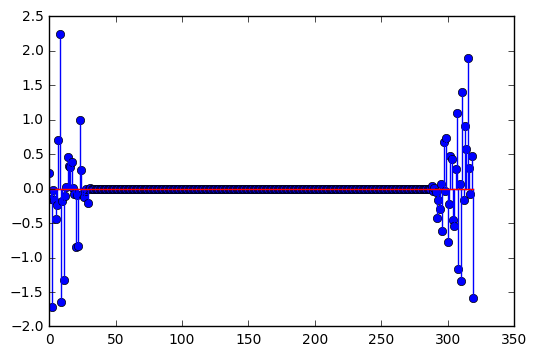

In [2]:
def mdct(x, w):
    N = int(x.size / 2)
    X = np.zeros(N)
    nn = np.arange(0, 2*N)
    for k in range(0, N):
        X[k] = np.sum(w * x * np.cos((np.pi/N) * (nn + 1/2 + N/2) * (k + 1/2)))
    return X

def imdct(X):
    N = int(X.size)
    y = np.zeros(2*N)
    kk = np.arange(0, N)
    for n in range(0, 2*N):
        y[n] = (2/N) * np.sum(X * np.cos((np.pi/N) * (n + 1/2 + N/2) * (kk + 1/2)))
    return y * w

M = 10
N = 32
x = np.random.randn(M*N)
nn = np.arange(0, 2*N)
w = np.sin((np.pi/(2*N))*(nn+1/2))
xm = np.array([(x[n:n+2*N]) for n in range(0, len(x)-N, N)]).T
X = np.zeros((N, xm.shape[1]))
for m in range (0, xm.shape[1]):
    X[:, m] = mdct(xm[:, m], w)
y = np.zeros(M*N)
for m, n in enumerate(range(0, len(x)-N, N)):
    y[n:n+2*N] += imdct(X[:, m])
z = abs(y-x)
print(np.max(z[N:-N]))
plt.stem(y-x)

# Ventanas
1) en MP3 y MPEG-2 AAC

$$\displaystyle w[n]=\sin\left(\frac{\pi}{2N}\left(n+\frac{1}{2}\right)\right)$$

2) en Vorbis

$$\displaystyle w[n]=\sin\left(\frac{\pi}{2}\sin^2\left(\frac{\pi}{2N}\left(n+\frac{1}{2}\right)\right)\right)$$

3) Kaiser-Bessel derived (KBD) en AC-3 y MPEG-4 AAC 


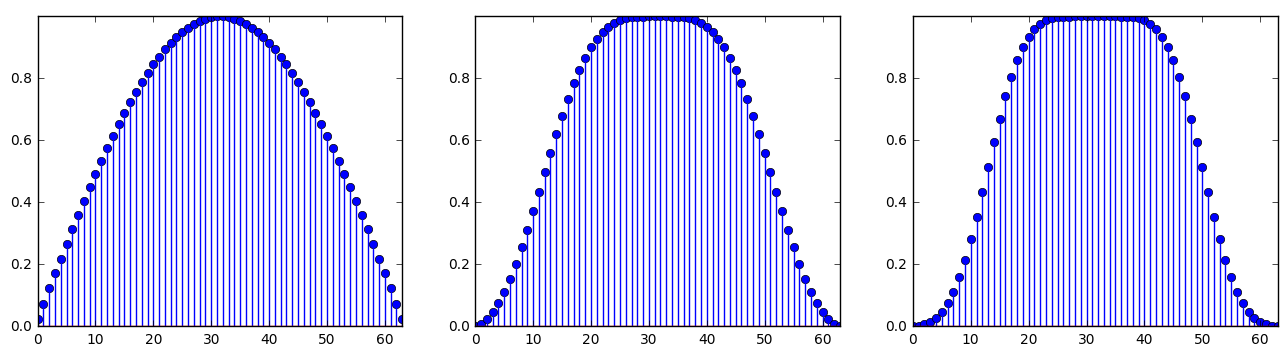

In [3]:
from scipy import signal as sg
def kbd(alpha, N):
    M = int(N/2)
    w = sg.kaiser(M+1, alpha)
    S = np.cumsum(w)
    d = np.zeros(N)
    d[0:M] = np.sqrt(S[0:M]/S[M])
    d[M:2*M] = np.sqrt(S[M-1::-1]/S[M])
    return d

N = 32
nn = np.arange(0, 2*N)
w1 = np.sin((np.pi/(2*N))*(nn+1/2))
w2 = np.sin((np.pi/2)*np.sin((np.pi/(2*N))*(nn+(1/2)))**2)
w3 = kbd(16, 2*N)
plt.figure(figsize=(16, 4))
plt.subplot(131), plt.stem(nn, w1), plt.axis('tight')
plt.subplot(132), plt.stem(nn, w2), plt.axis('tight')
plt.subplot(133), plt.stem(nn, w3), plt.axis('tight')

# Princen-Bradley condition
for n in range(0, N):
    assert np.allclose(w1[n]**2 + w1[n+N]**2, 1.0), 'w1[n] no cumple'
    assert np.allclose(w2[n]**2 + w2[n+N]**2, 1.0), 'w2[n] no cumple'
    assert np.allclose(w3[n]**2 + w3[n+N]**2, 1.0), 'w3[n] no cumple'

<function __main__.kbdplot>

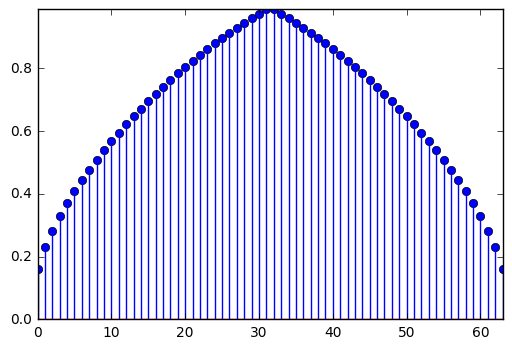

In [4]:
from ipywidgets import interact
def kbdplot(alpha=1):
    N = 64
    plt.stem(np.arange(0, N), kbd(alpha, N))
    plt.axis('tight')
interact(kbdplot, alpha=(0, 32, 1))

## Núcleo
$$\Phi[n,k]=\cos\left(\frac{\pi}{N}\left(n+\frac{1}{2}+\frac{N}{2}\right) \left(k+\frac{1}{2}\right)\right)$$

<function __main__.phiplot>

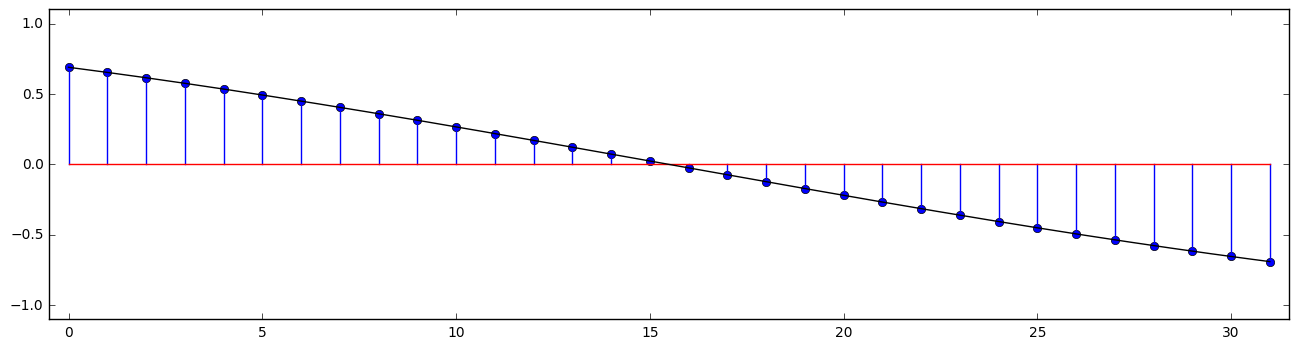

In [5]:
from ipywidgets import interact
def phiplot(k=0):
    N = 32
    plt.figure(figsize=(16, 4))
    Phi = np.zeros(N)
    nn = np.arange(0, N)
    phi = np.cos((np.pi/N) * (nn + 1/2 + N/2) * (k + 1/2))
    plt.stem(nn, phi)
    n2 = np.linspace(0, N-1, 2048)
    w = (np.pi/N) * (k + 1/2)
    phi = (np.pi/N) * (1/2 + N/2) * (k + 1/2)
    plt.plot(n2, np.cos(w * n2 + phi), 'k')
    plt.axis([-0.5, 31.5, -1.1, 1.1])
interact(phiplot, k=(0, 31, 1))